In [297]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix


In [298]:
DATADIR = "C:/Users/renep/Documents/kagglecatsanddogs_3367a/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

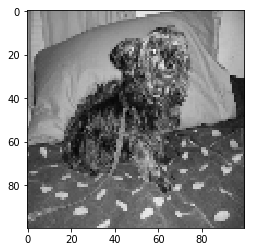


 13%|████████████████████████▉                                                                                                                                                                        | 1613/12501 [00:08<00:50, 213.68it/s]


 26%|██████████████████████████████████████████████████▏                                                                                                                                              | 3251/12501 [00:15<00:46, 200.52it/s]


 39%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 4904/12501 [00:23<00:31, 238.87it/s]


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                           | 6560/12501 [00:30<00:24, 239.47it/s]


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 8216/12501 [00:37<00:20, 211.20it/s]


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 9858/12501 [00:45<00:11, 231.90it/s]


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 11513/12501 [00:52<00:04, 239.24it/s]


  5%|█████████▉                                                                                                                                                                                        | 637/12501 [00:02<00:54, 218.61it/s]


 19%|███████████████████████████████████▉                                                                                                                                                             | 2330/12501 [00:10<00:41, 246.15it/s]


 32%|██████████████████████████████████████████████████████████████▎                                                                                                                                  | 4034/12501 [00:17<00:35, 241.81it/s]


 45%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 5683/12501 [00:25<00:28, 241.80it/s]


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                               | 7335/12501 [00:32<00:25, 201.14it/s]


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 8912/12501 [00:40<00:15, 226.10it/s]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 10587/12501 [00:47<00:08, 238.66it/s]


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 12307/12501 [00:54<00:00, 252.28it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:55<00:00, 224.80it/s]

24946


In [299]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),1)
plt.imshow(new_array, cmap='gray')
plt.show()

training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE),1)  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))


In [300]:
random.shuffle(training_data)
# for sample in training_data[:20]:
#     print(sample[1])
    
X = []
Y = []

for features,label in tqdm(training_data):
    X.append(features)
    Y.append(label)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24946/24946 [00:00<00:00, 1137010.40it/s]

In [301]:
Y.count(0),Y.count(1)

(12470, 12476)

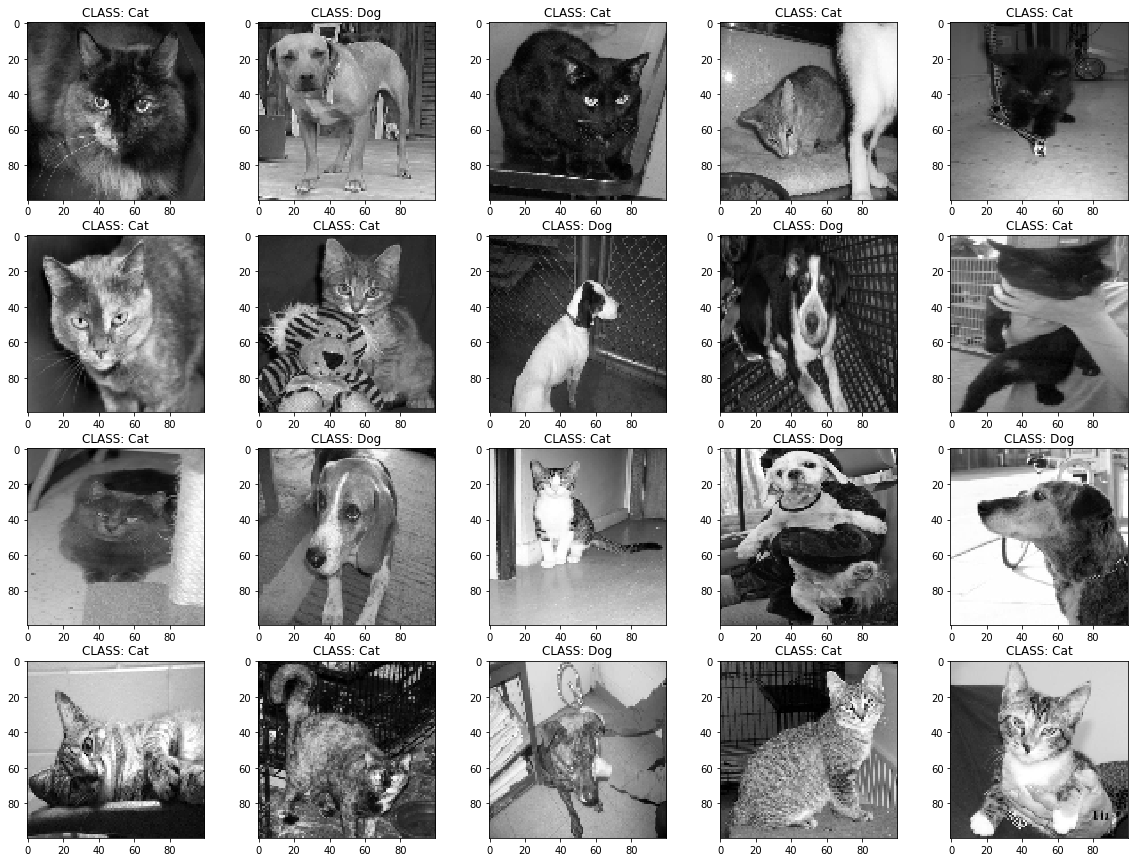

In [302]:
fig = plt.figure(figsize=[20,15])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X[i], cmap = 'gray')
    plt.title("CLASS: " + CATEGORIES[Y[i]])

In [303]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [304]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

#X = X/255.0

X = tf.keras.utils.normalize(X)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
#                                             min_delta=0.01, 
#                                             patience=5, 
#                                             verbose=1, 
#                                             mode='auto', 
#                                             baseline=None, 
#                                             restore_best_weights=True)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#callbacks = [callback], 
              
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
activation_52 (Activation)   (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_53 (Activation)   (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 33856)           

In [305]:
X = np.reshape(X, (len(X),IMG_SIZE,IMG_SIZE,1))


In [309]:
x_test,x_train, y_test, y_train = train_test_split(X, Y, test_size=0.8)#, random_state = 42)

In [310]:
history = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_split=0.2)

Train on 15965 samples, validate on 3992 samples
Epoch 1/30
15965/15965 [==============================] - ETA: 4:53 - loss: 0.6937 - accuracy: 0.41 - ETA: 3:23 - loss: 0.7114 - accuracy: 0.45 - ETA: 2:56 - loss: 0.7042 - accuracy: 0.48 - ETA: 2:41 - loss: 0.7012 - accuracy: 0.49 - ETA: 2:31 - loss: 0.6996 - accuracy: 0.49 - ETA: 2:25 - loss: 0.6986 - accuracy: 0.49 - ETA: 2:20 - loss: 0.6979 - accuracy: 0.48 - ETA: 2:16 - loss: 0.6973 - accuracy: 0.49 - ETA: 2:13 - loss: 0.6968 - accuracy: 0.50 - ETA: 2:10 - loss: 0.6963 - accuracy: 0.51 - ETA: 2:08 - loss: 0.6960 - accuracy: 0.50 - ETA: 2:06 - loss: 0.6958 - accuracy: 0.50 - ETA: 2:04 - loss: 0.6955 - accuracy: 0.50 - ETA: 2:01 - loss: 0.6953 - accuracy: 0.50 - ETA: 2:00 - loss: 0.6951 - accuracy: 0.51 - ETA: 1:58 - loss: 0.6950 - accuracy: 0.51 - ETA: 1:57 - loss: 0.6949 - accuracy: 0.51 - ETA: 1:55 - loss: 0.6946 - accuracy: 0.51 - ETA: 1:53 - loss: 0.6947 - accuracy: 0.51 - ETA: 1:52 - loss: 0.6946 - accuracy: 0.51 - ETA: 1:50 - l

15965/15965 [==============================] - ETA: 1:59 - loss: 0.4892 - accuracy: 0.79 - ETA: 2:04 - loss: 0.4894 - accuracy: 0.79 - ETA: 2:05 - loss: 0.5112 - accuracy: 0.76 - ETA: 2:02 - loss: 0.5199 - accuracy: 0.74 - ETA: 2:05 - loss: 0.5073 - accuracy: 0.75 - ETA: 2:06 - loss: 0.5316 - accuracy: 0.73 - ETA: 2:05 - loss: 0.5370 - accuracy: 0.72 - ETA: 2:03 - loss: 0.5437 - accuracy: 0.71 - ETA: 2:01 - loss: 0.5539 - accuracy: 0.70 - ETA: 1:58 - loss: 0.5568 - accuracy: 0.70 - ETA: 1:57 - loss: 0.5581 - accuracy: 0.70 - ETA: 1:56 - loss: 0.5563 - accuracy: 0.70 - ETA: 1:55 - loss: 0.5552 - accuracy: 0.70 - ETA: 1:53 - loss: 0.5552 - accuracy: 0.70 - ETA: 1:52 - loss: 0.5552 - accuracy: 0.71 - ETA: 1:52 - loss: 0.5637 - accuracy: 0.70 - ETA: 1:50 - loss: 0.5635 - accuracy: 0.70 - ETA: 1:49 - loss: 0.5598 - accuracy: 0.71 - ETA: 1:49 - loss: 0.5568 - accuracy: 0.71 - ETA: 1:48 - loss: 0.5587 - accuracy: 0.71 - ETA: 1:47 - loss: 0.5576 - accuracy: 0.71 - ETA: 1:47 - loss: 0.5556 - ac

15965/15965 [==============================] - ETA: 1:54 - loss: 0.5113 - accuracy: 0.76 - ETA: 1:58 - loss: 0.5271 - accuracy: 0.70 - ETA: 1:55 - loss: 0.5123 - accuracy: 0.72 - ETA: 1:55 - loss: 0.5040 - accuracy: 0.73 - ETA: 1:54 - loss: 0.4849 - accuracy: 0.75 - ETA: 1:54 - loss: 0.4813 - accuracy: 0.76 - ETA: 1:53 - loss: 0.4842 - accuracy: 0.75 - ETA: 1:53 - loss: 0.4893 - accuracy: 0.76 - ETA: 1:52 - loss: 0.4914 - accuracy: 0.75 - ETA: 1:51 - loss: 0.4845 - accuracy: 0.76 - ETA: 1:49 - loss: 0.4800 - accuracy: 0.76 - ETA: 1:48 - loss: 0.4795 - accuracy: 0.76 - ETA: 1:48 - loss: 0.4835 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4734 - accuracy: 0.77 - ETA: 1:46 - loss: 0.4717 - accuracy: 0.78 - ETA: 1:45 - loss: 0.4699 - accuracy: 0.78 - ETA: 1:44 - loss: 0.4664 - accuracy: 0.78 - ETA: 1:43 - loss: 0.4702 - accuracy: 0.78 - ETA: 1:43 - loss: 0.4725 - accuracy: 0.77 - ETA: 1:42 - loss: 0.4698 - accuracy: 0.78 - ETA: 1:41 - loss: 0.4672 - accuracy: 0.78 - ETA: 1:40 - loss: 0.4644 - ac

15965/15965 [==============================] - ETA: 1:52 - loss: 0.3451 - accuracy: 0.89 - ETA: 1:50 - loss: 0.3548 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3655 - accuracy: 0.84 - ETA: 1:52 - loss: 0.3641 - accuracy: 0.84 - ETA: 1:51 - loss: 0.3602 - accuracy: 0.85 - ETA: 1:51 - loss: 0.3701 - accuracy: 0.84 - ETA: 1:50 - loss: 0.3789 - accuracy: 0.84 - ETA: 1:49 - loss: 0.3721 - accuracy: 0.84 - ETA: 1:48 - loss: 0.3653 - accuracy: 0.84 - ETA: 1:47 - loss: 0.3628 - accuracy: 0.84 - ETA: 1:47 - loss: 0.3619 - accuracy: 0.85 - ETA: 1:46 - loss: 0.3607 - accuracy: 0.85 - ETA: 1:46 - loss: 0.3560 - accuracy: 0.85 - ETA: 1:45 - loss: 0.3683 - accuracy: 0.84 - ETA: 1:44 - loss: 0.3688 - accuracy: 0.84 - ETA: 1:43 - loss: 0.3687 - accuracy: 0.84 - ETA: 1:42 - loss: 0.3673 - accuracy: 0.84 - ETA: 1:42 - loss: 0.3703 - accuracy: 0.84 - ETA: 1:41 - loss: 0.3786 - accuracy: 0.84 - ETA: 1:40 - loss: 0.3785 - accuracy: 0.84 - ETA: 1:39 - loss: 0.3796 - accuracy: 0.83 - ETA: 1:39 - loss: 0.3779 - ac

15965/15965 [==============================] - ETA: 1:52 - loss: 0.2448 - accuracy: 0.89 - ETA: 1:52 - loss: 0.2275 - accuracy: 0.92 - ETA: 1:50 - loss: 0.2537 - accuracy: 0.90 - ETA: 1:50 - loss: 0.2579 - accuracy: 0.90 - ETA: 1:49 - loss: 0.2627 - accuracy: 0.90 - ETA: 1:48 - loss: 0.2498 - accuracy: 0.91 - ETA: 1:47 - loss: 0.2471 - accuracy: 0.91 - ETA: 1:46 - loss: 0.2463 - accuracy: 0.90 - ETA: 1:45 - loss: 0.2500 - accuracy: 0.90 - ETA: 1:45 - loss: 0.2556 - accuracy: 0.90 - ETA: 1:44 - loss: 0.2626 - accuracy: 0.90 - ETA: 1:44 - loss: 0.2732 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2720 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2684 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2709 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2660 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2671 - accuracy: 0.89 - ETA: 1:39 - loss: 0.2663 - accuracy: 0.89 - ETA: 1:38 - loss: 0.2660 - accuracy: 0.89 - ETA: 1:38 - loss: 0.2647 - accuracy: 0.89 - ETA: 1:37 - loss: 0.2649 - accuracy: 0.89 - ETA: 1:36 - loss: 0.2662 - ac

15965/15965 [==============================] - ETA: 1:51 - loss: 0.2146 - accuracy: 0.91 - ETA: 1:49 - loss: 0.2208 - accuracy: 0.92 - ETA: 1:48 - loss: 0.2023 - accuracy: 0.93 - ETA: 1:49 - loss: 0.2187 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2163 - accuracy: 0.92 - ETA: 1:48 - loss: 0.2161 - accuracy: 0.92 - ETA: 1:49 - loss: 0.2194 - accuracy: 0.91 - ETA: 1:48 - loss: 0.2149 - accuracy: 0.91 - ETA: 1:47 - loss: 0.2158 - accuracy: 0.91 - ETA: 1:47 - loss: 0.2189 - accuracy: 0.91 - ETA: 1:47 - loss: 0.2216 - accuracy: 0.91 - ETA: 1:46 - loss: 0.2197 - accuracy: 0.91 - ETA: 1:46 - loss: 0.2190 - accuracy: 0.91 - ETA: 1:45 - loss: 0.2209 - accuracy: 0.91 - ETA: 1:44 - loss: 0.2212 - accuracy: 0.91 - ETA: 1:43 - loss: 0.2240 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2256 - accuracy: 0.91 - ETA: 1:42 - loss: 0.2247 - accuracy: 0.91 - ETA: 1:41 - loss: 0.2252 - accuracy: 0.91 - ETA: 1:40 - loss: 0.2225 - accuracy: 0.91 - ETA: 1:39 - loss: 0.2217 - accuracy: 0.91 - ETA: 1:39 - loss: 0.2261 - ac

15965/15965 [==============================] - ETA: 1:54 - loss: 0.1787 - accuracy: 0.89 - ETA: 1:54 - loss: 0.1424 - accuracy: 0.94 - ETA: 1:54 - loss: 0.1355 - accuracy: 0.94 - ETA: 1:53 - loss: 0.1449 - accuracy: 0.94 - ETA: 1:52 - loss: 0.1448 - accuracy: 0.94 - ETA: 1:51 - loss: 0.1428 - accuracy: 0.94 - ETA: 1:50 - loss: 0.1441 - accuracy: 0.94 - ETA: 1:49 - loss: 0.1420 - accuracy: 0.94 - ETA: 1:48 - loss: 0.1401 - accuracy: 0.95 - ETA: 1:48 - loss: 0.1374 - accuracy: 0.95 - ETA: 1:47 - loss: 0.1337 - accuracy: 0.95 - ETA: 1:47 - loss: 0.1338 - accuracy: 0.95 - ETA: 1:46 - loss: 0.1339 - accuracy: 0.95 - ETA: 1:46 - loss: 0.1349 - accuracy: 0.95 - ETA: 1:45 - loss: 0.1356 - accuracy: 0.95 - ETA: 1:45 - loss: 0.1337 - accuracy: 0.95 - ETA: 1:45 - loss: 0.1361 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1344 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1346 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1338 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1384 - accuracy: 0.95 - ETA: 1:41 - loss: 0.1420 - ac

15965/15965 [==============================] - ETA: 2:00 - loss: 0.1229 - accuracy: 0.95 - ETA: 1:56 - loss: 0.0958 - accuracy: 0.97 - ETA: 1:56 - loss: 0.0872 - accuracy: 0.97 - ETA: 1:55 - loss: 0.0907 - accuracy: 0.97 - ETA: 1:53 - loss: 0.0826 - accuracy: 0.97 - ETA: 1:52 - loss: 0.0877 - accuracy: 0.97 - ETA: 1:51 - loss: 0.0874 - accuracy: 0.97 - ETA: 1:50 - loss: 0.0914 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0878 - accuracy: 0.97 - ETA: 1:49 - loss: 0.0908 - accuracy: 0.97 - ETA: 1:48 - loss: 0.0927 - accuracy: 0.97 - ETA: 1:47 - loss: 0.0921 - accuracy: 0.97 - ETA: 1:46 - loss: 0.0908 - accuracy: 0.97 - ETA: 1:46 - loss: 0.0917 - accuracy: 0.97 - ETA: 1:45 - loss: 0.0944 - accuracy: 0.96 - ETA: 1:44 - loss: 0.0979 - accuracy: 0.96 - ETA: 1:43 - loss: 0.0972 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0951 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0956 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0971 - accuracy: 0.96 - ETA: 1:39 - loss: 0.0955 - accuracy: 0.96 - ETA: 1:39 - loss: 0.0938 - ac

15965/15965 [==============================] - ETA: 1:55 - loss: 0.0908 - accuracy: 0.98 - ETA: 1:54 - loss: 0.0688 - accuracy: 0.98 - ETA: 1:54 - loss: 0.0583 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0603 - accuracy: 0.98 - ETA: 1:53 - loss: 0.0565 - accuracy: 0.98 - ETA: 1:52 - loss: 0.0539 - accuracy: 0.98 - ETA: 1:51 - loss: 0.0537 - accuracy: 0.98 - ETA: 1:50 - loss: 0.0514 - accuracy: 0.98 - ETA: 1:49 - loss: 0.0489 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0495 - accuracy: 0.98 - ETA: 1:48 - loss: 0.0506 - accuracy: 0.98 - ETA: 1:47 - loss: 0.0518 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0528 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0515 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0500 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0497 - accuracy: 0.98 - ETA: 1:43 - loss: 0.0498 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0491 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0485 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0478 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0486 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0502 - ac

15965/15965 [==============================] - ETA: 1:53 - loss: 0.0301 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0252 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0219 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0202 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0212 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0216 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0201 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0197 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0198 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0193 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0187 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0185 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0191 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0188 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0197 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0194 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0195 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0192 - ac

15965/15965 [==============================] - ETA: 2:00 - loss: 0.0051 - accuracy: 1.00 - ETA: 2:00 - loss: 0.0085 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0084 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0101 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0092 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0096 - accuracy: 1.00 - ETA: 1:53 - loss: 0.0088 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0087 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0091 - accuracy: 1.00 - ETA: 1:51 - loss: 0.0091 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0091 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0094 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0090 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0088 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0086 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0087 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0086 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0086 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0086 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0086 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0086 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0085 - ac

15965/15965 [==============================] - ETA: 1:53 - loss: 0.0044 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0031 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0031 - accuracy: 1.00 - ETA: 1:51 - loss: 0.0029 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0035 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0037 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0038 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0039 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0040 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0042 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0043 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0041 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0042 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0053 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0051 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0051 - accuracy: 0.99 - ETA: 1:43 - loss: 0.0051 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0052 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0054 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0054 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0053 - ac

15965/15965 [==============================] - ETA: 1:55 - loss: 0.0029 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0022 - accuracy: 1.00 - ETA: 2:00 - loss: 0.0022 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0022 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0022 - accuracy: 1.00 - ETA: 1:54 - loss: 0.0021 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0020 - accuracy: 1.00 - ETA: 1:51 - loss: 0.0021 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0022 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0022 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0024 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0024 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0023 - accuracy: 1.00 - ETA: 1:40 - loss: 0.0023 - ac

15965/15965 [==============================] - ETA: 1:58 - loss: 0.0011 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0015 - accuracy: 1.00 - ETA: 2:00 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:53 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:50 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:49 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0015 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:44 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:43 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:42 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:41 - loss: 0.0013 - ac

15965/15965 [==============================] - ETA: 1:55 - loss: 7.0780e-04 - accuracy: 1.00 - ETA: 1:53 - loss: 8.0488e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 8.0537e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 8.6851e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 9.6868e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 9.4009e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 8.6850e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 8.2839e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 8.1045e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 8.2891e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 9.0017e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 9.5954e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 9.6319e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 9.7245e-04 - accuracy: 1.00 - ETA: 1:47 - loss: 0.0010 - accuracy: 1.0000   - ETA: 1:46 - loss: 0.0010 - accuracy: 1.00 - ETA: 1:45 - loss: 0.0010 - accuracy: 1.00 - ETA: 1:45 - loss: 9.8862e-04 - accuracy: 1.00 - ETA: 1:44 - loss: 9.7082e-04 - accuracy: 1.00 - ETA: 1:43 - loss: 9.7478e-04 - accuracy: 1.00 - E

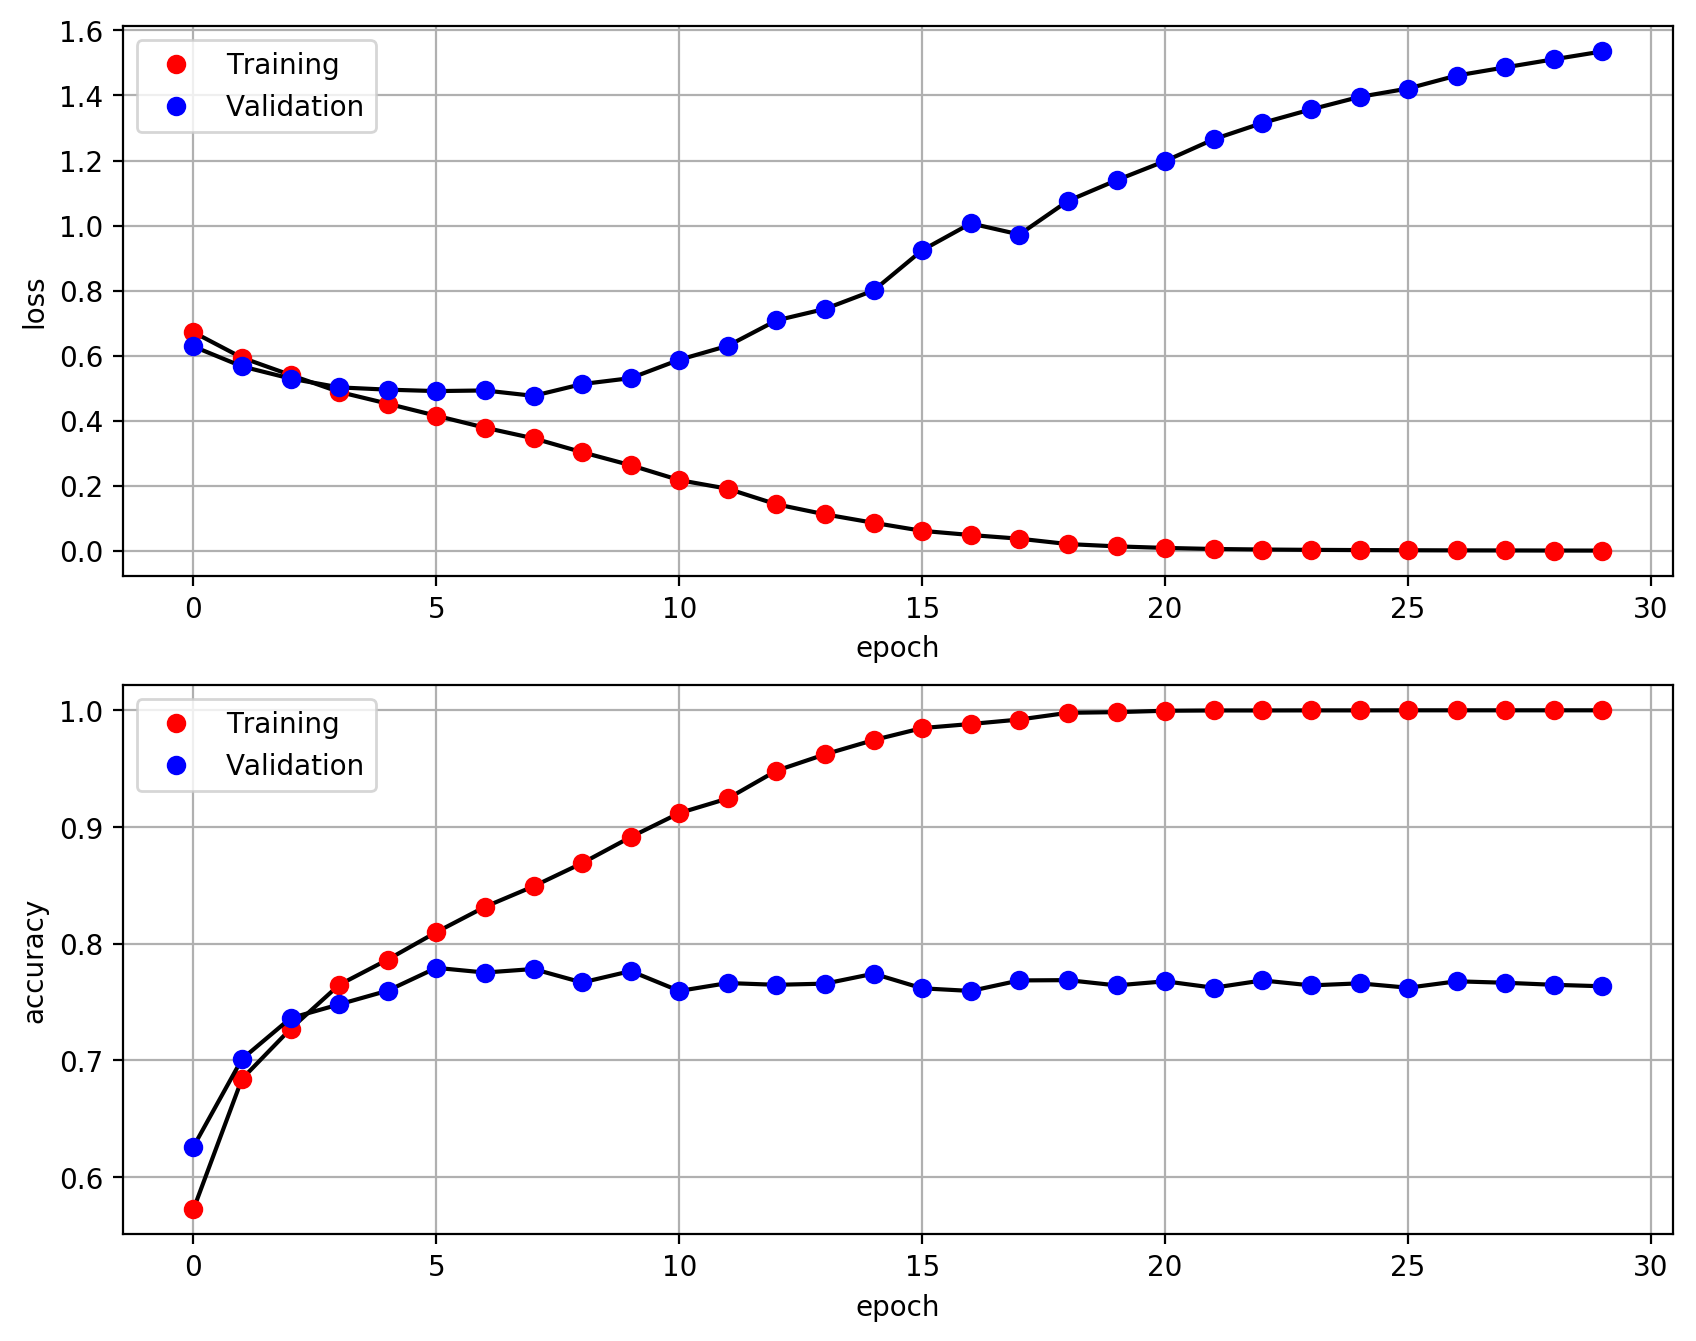

In [324]:
plt.figure(figsize=[10,8], facecolor = 'w', dpi = 200)
plt.subplot(211)
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['loss'], 'ro', label = "Training")
plt.plot(history.history['val_loss'], 'k-')
plt.plot(history.history['val_loss'], 'bo', label = "Validation")
# plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(history.history['accuracy'], 'k-')
plt.plot(history.history['accuracy'], 'ro', label = "Training")
plt.plot(history.history['val_accuracy'], 'k-')
plt.plot(history.history['val_accuracy'], 'bo', label = "Validation")
# plt.title('loss function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()


In [312]:
predictions = model.predict(x_test)

In [313]:
y_pred = np.round(predictions)

In [314]:
result = confusion_matrix(y_test, y_pred)

In [317]:
result

array([[1899,  579],
       [ 617, 1894]], dtype=int64)

(-0.5, 1.5, 1.5, -0.5)

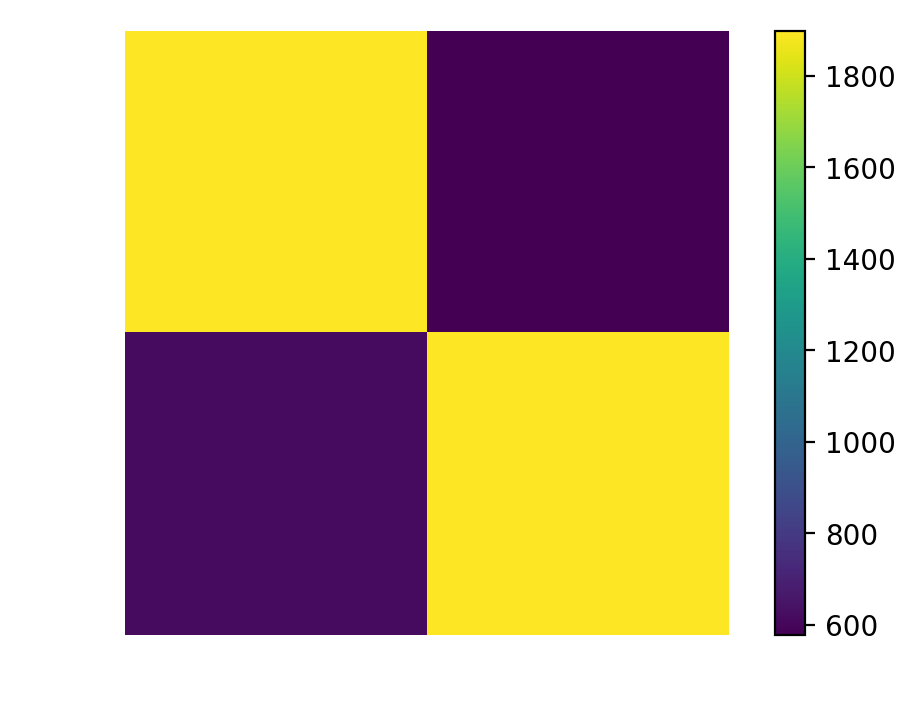

In [332]:
plt.figure(dpi = 200)
plt.imshow(result)
plt.colorbar()
plt.axis('off')
#plt.clim(0,300)

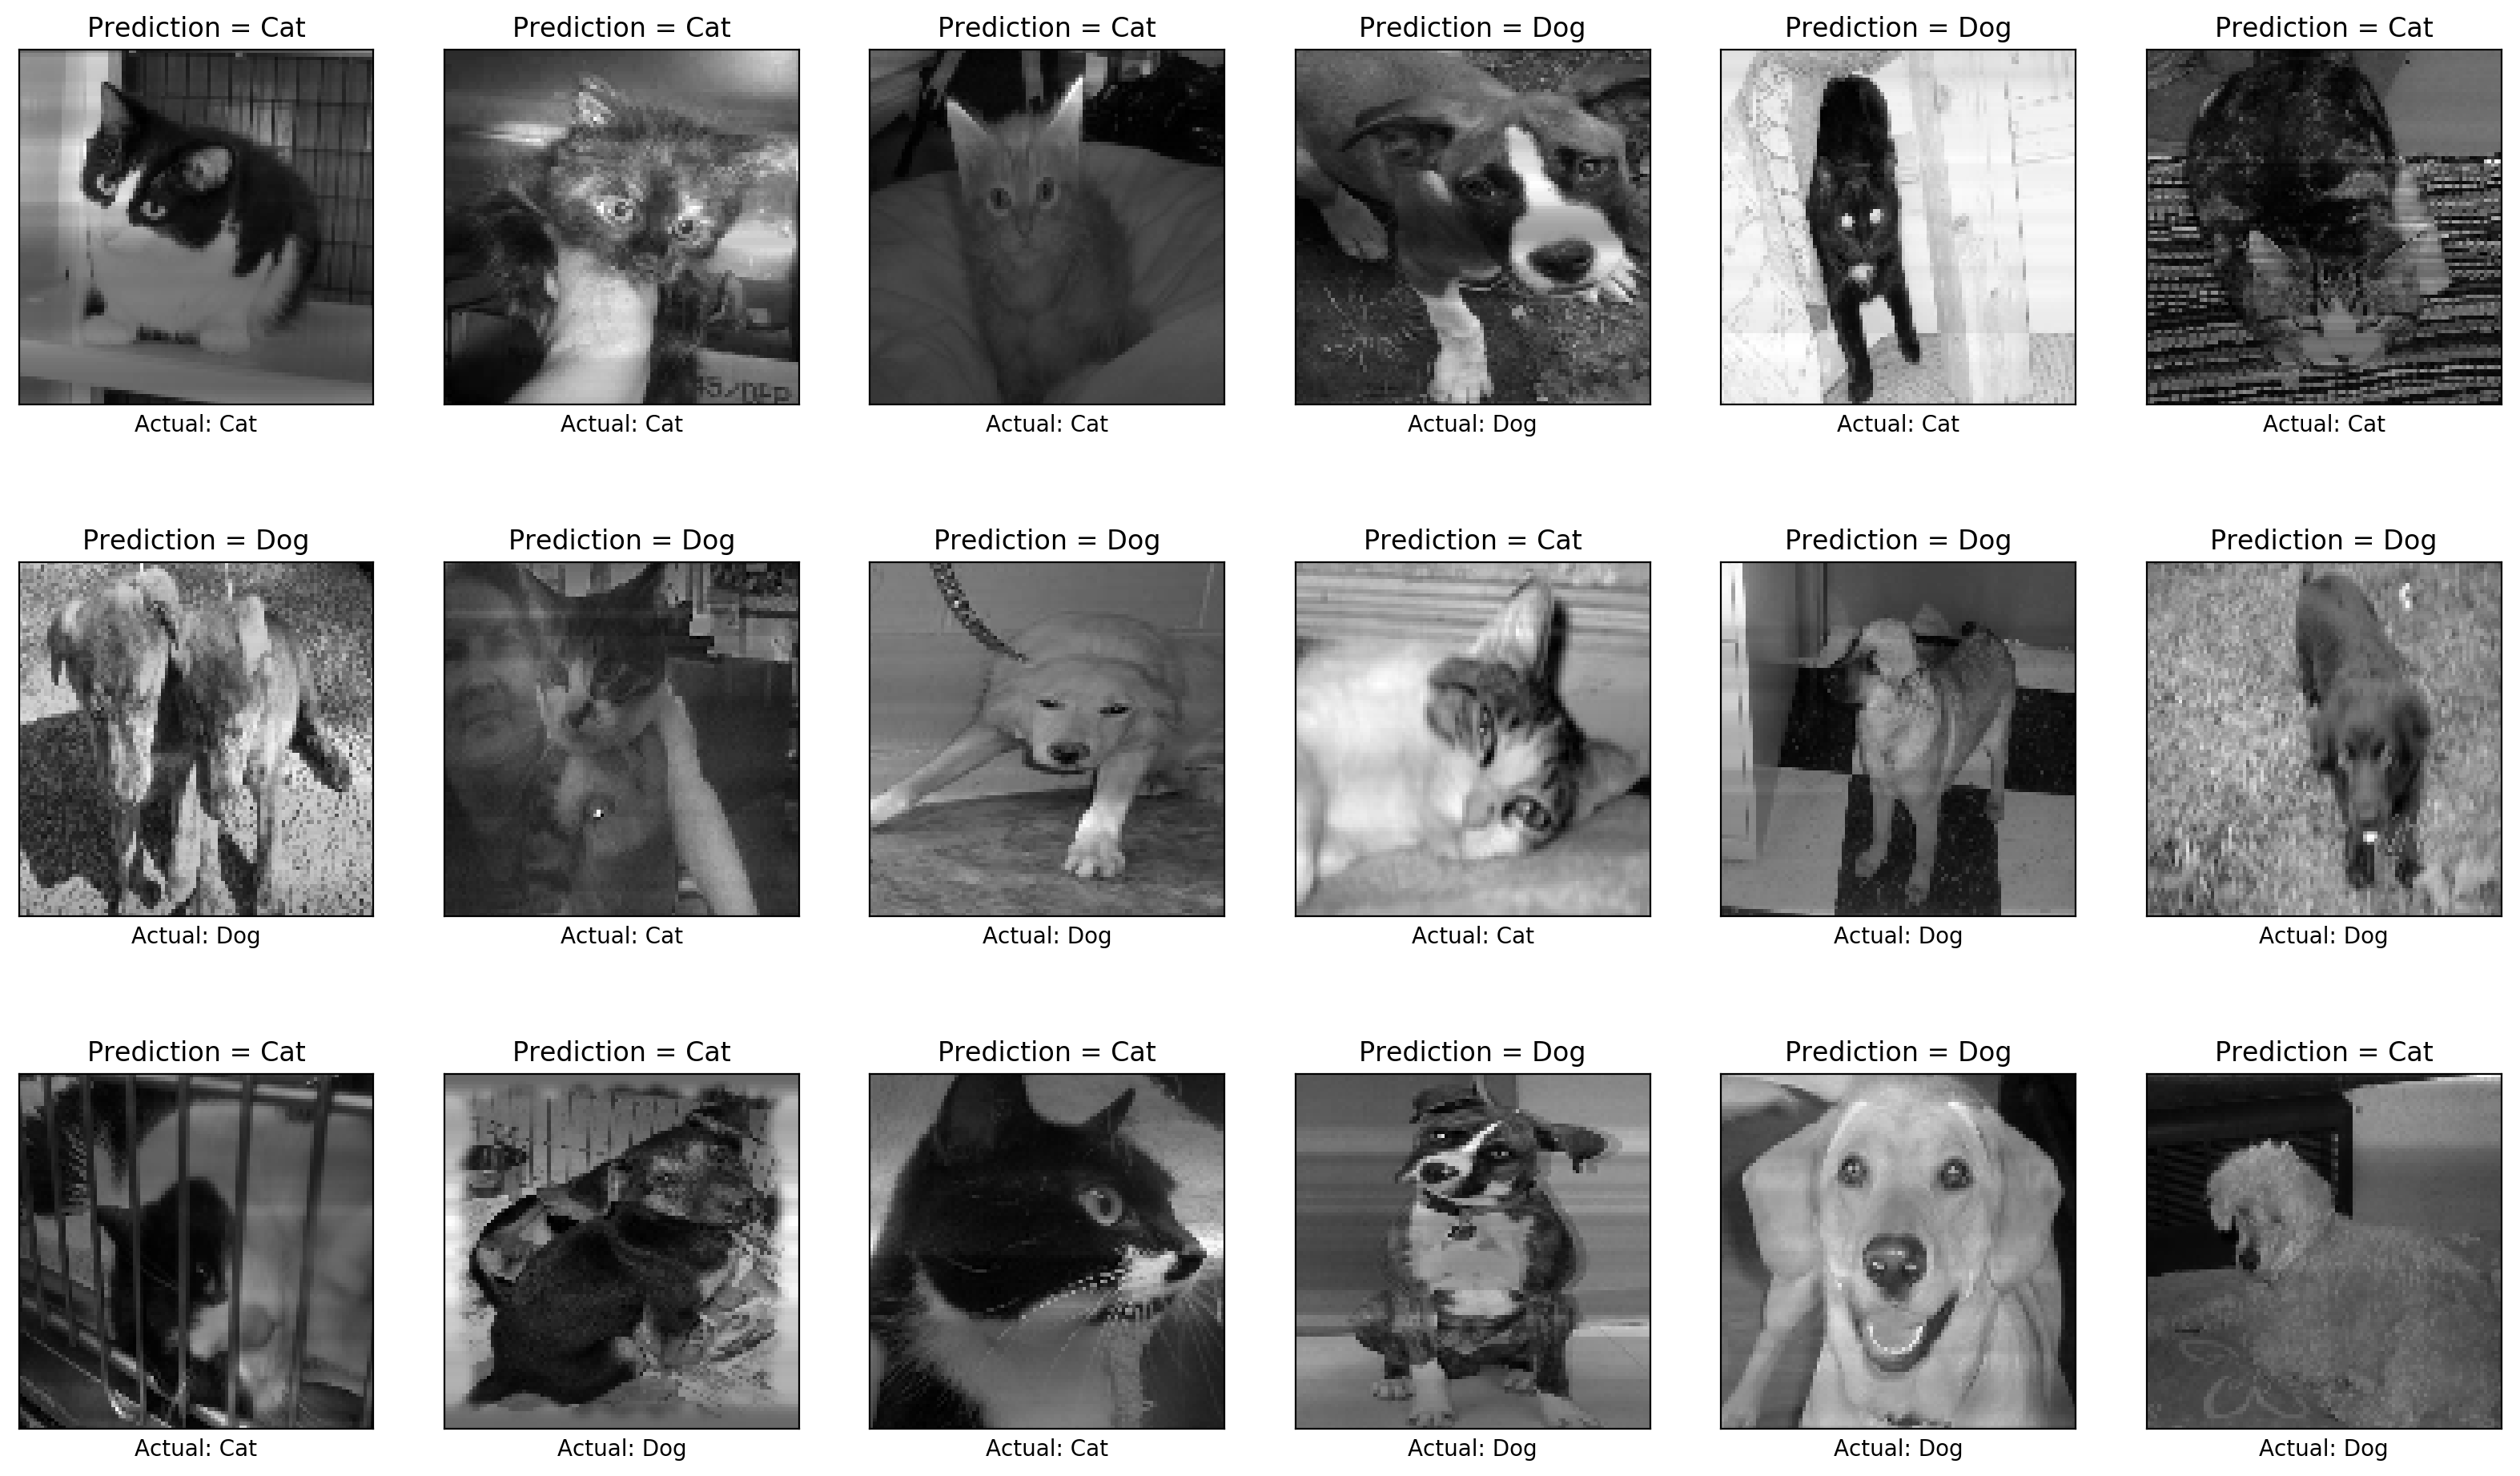

In [341]:
fig = plt.figure(figsize=[20,12], dpi = 200)

for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(x_test[i,:,:,0], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Actual: " + str(CATEGORIES[y_test[i]]))
    plt.title('Prediction = ' + str(CATEGORIES[int(np.round(predictions[i]))]))


In [61]:
x_test[1,:,:,0].shape

(100, 100)